In [21]:
import scipy as sp
import numpy as np

In [30]:
%matplotlib inline
# Rosenbrock is defined on -2 < x < 2 and -1 < y < 3, max: 2500
def rosenbrock(x, y):
      return (1-x)**2 + 100* ((y-x**2))**2
def rosenbrock_arr(X):
      return (1-X[:, 0])**2 + 100* ((X[:, 1]-X[:, 0]**2))**2
# Himmelblau is -5 < x,y 5
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2
def himmelblau_arr(X):
    return (X[:, 0]**2 + X[:, 1] - 11)**2 + (X[:, 0] + X[:, 1]**2 - 7)**2

def eggholder_arr(X):
    mask = ((X > 512).astype(int) | (X < -512).astype(int)).any(axis=1)
    f = -(X[:, 1]+47) * np.sin(np.sqrt(np.abs( X[:, 0] / 2.0 + (X[:, 1]+47) ))) - X[:, 0]*np.sin(np.sqrt(np.abs(X[:, 0]-(X[:, 1]+47))))
    f[mask] = np.Inf
    return f
def eggholder(X, Y):
    return -(Y+47) * np.sin(np.sqrt(np.abs( X / 2.0 + (Y+47) ))) - X*np.sin(np.sqrt(np.abs(X-(Y+47))))
    


(3664, 4095)


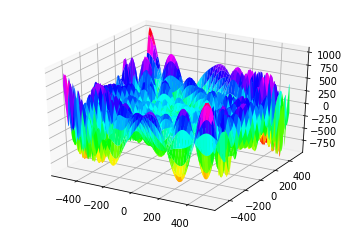

<Figure size 432x288 with 0 Axes>

In [83]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import numpy as np

fig = plot.figure()
ax = fig.gca(projection='3d')

s = 0.25   # Try s=1, 0.25, 0.1, or 0.05

X = np.arange(-512, 512, s)   #Could use linspace instead if dividing
Y = np.arange(-512, 512, s)   #evenly instead of stepping...
    
#Create the mesh grid(s) for all X/Y combos.
X, Y = np.meshgrid(X, Y)

#Rosenbrock function w/ two parameters using numpy Arrays
Z = eggholder(X, Y)

#rosenbrock plot code:
fig = plt.figure()
#ax = Axes3D(fig, azim = -128, elev = 43)
#ax = Axes3D(fig, azim = 115, elev =45) good

print(np.unravel_index(Z.argmin(), Z.shape))

surf = ax.plot_surface(X, Y, Z, cmap=cm.hsv,)  #Try coolwarm vs jet
 
#Displays the figure, handles user interface, returns when user closes window
plot.show()

[347.32697222 499.41539825] [-888.94912527 -888.94912527 -888.94912527 -888.94912527 -888.94912527
 -888.94912527 -888.94912527 -888.94912527 -888.94912527 -888.94912527
 -888.94912527 -888.94912527 -888.94912527 -888.94912527 -888.94912527
 -888.94912527 -888.94912527 -888.94912527 -888.94912527 -888.94912527
 -888.94912527 -888.94912527 -888.94912527 -888.94912527 -888.94912527
 -888.94912527 -888.94912527 -888.94912527 -888.94912527 -888.94912527
 -888.94912527 -888.94912527 -888.94912527 -888.94912527 -888.94912527
 -888.94912527 -888.94912527 -888.94912527 -888.94912527 -888.94912527
 -888.94912527 -888.94912527 -888.94912527 -888.94912527 -888.94912527
 -888.94912527 -888.94912527 -888.94912527 -888.94912527 -888.94912527
 -888.94912527 -888.94912527 -888.94912527 -888.94912527 -888.94912527
 -888.94912527 -888.94912527 -888.94912527 -888.94912527 -888.94912527
 -888.94912527 -888.94912527 -888.94912527 -888.94912527 -888.94912527
 -888.94912527 -888.94912527 -888.94912527 -888.9

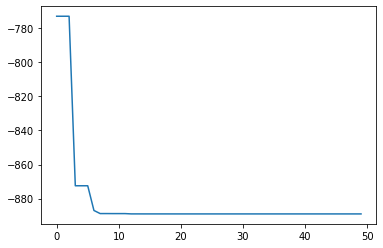

In [92]:
N_PARTICLES    = 100
N_ITER         = 50
omega          = 0.5

f  = eggholder_arr
f2 = eggholder

lbx = -512
ubx = 512
lby = -512
uby = 512
max_val = 1300
V              = np.random.uniform(-0.1, 0.1, (N_PARTICLES, 2))
P              = np.random.uniform(lbx,  uby, (N_PARTICLES, 2))
best_P         = P
best_swarm_P   = np.full_like(best_P, best_P[np.argmin(rosenbrock(best_P[:, 0], best_P[:, 1]))])
fitness = []

s  = 0.25   # Try s=1, 0.25, 0.1, or 0.05
X  = np.arange(lbx,  ubx, s)   #Could use linspace instead if dividing
Y  = np.arange(lby,  uby, s)   #evenly instead of stepping...
    
#Create the mesh grid(s) for all X/Y combos.
X, Y = np.meshgrid(X, Y)
Z = f2(X,Y)
fig = plot.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.set_xlim(lbx,  ubx)
ax.set_ylim(lby,  uby)
ax.set_zlim(-1000, max_val)
ax.plot_surface(X, Y, Z, cmap=cm.jet_r,)  #Try coolwarm vs jet
ax.scatter(P[:,0], P[:,1], max_val, color='black', marker='.', s=20)
plt.savefig('psofig/PSO-%s.png'%str(0).zfill(len(str(N_ITER))))
plt.close()
for i in range(1, N_ITER+1):
    r1 = np.random.uniform(0.0, 1.0, (N_PARTICLES, 2))
    r2 = np.random.uniform(0.0, 1.0, (N_PARTICLES, 2))
    V = omega*V + r1 * (best_P - P) + r2 * (best_swarm_P - P)
    P = P + V
    
    best_P[f(P) < f(best_P)] = P[f(P) < f(best_P)]
    best_swarm_P   = np.full_like(best_P, best_P[np.argmin(f(best_P))])
    fitness.append(f(best_swarm_P)[0])
    
    fig = plot.figure(figsize=(10,10))
    
    ax = fig.gca(projection='3d')
    ax.set_xlim(lbx,  ubx)
    ax.set_ylim(lby,  uby)
    ax.set_zlim(0, max_val)
    ax.scatter(P[:,0], P[:,1], max_val, color='black', marker='.', s=20)
    ax.plot_surface(X, Y, Z, cmap=cm.jet_r,)  #Try coolwarm vs jet
    plt.savefig('psofig/PSO-%s.png'%str(i).zfill(len(str(N_ITER))))
    plt.close()
    
plot.plot(fitness)
print(best_swarm_P[0], f(best_swarm_P[:]))

In [53]:
best_P[rosenbrock_arr(P) < rosenbrock_arr(best_P)] = P[rosenbrock_arr(P) < rosenbrock_arr(best_P)]

In [54]:
print(eggholder(512, 404.2319))

-959.6406627106155


In [ ]:
print(fitness)